In [1]:
from pyhail import hdr, hsda, common, hacc, mesh_ppi

import mesh_ppi_optimised

import pyodim

import matplotlib.pyplot as pl
import matplotlib.colors as colors
import numpy as np

import os
import time
from urllib import request

In [2]:
#download example radar data
radar_url = 'https://pyhail-public.s3.ap-southeast-2.amazonaws.com/66_20231110_063000.pvol.h5'
tmp_path = '/tmp/pyhail_example_data'
if not os.path.exists(tmp_path):
    os.makedirs(tmp_path)
filename = f'{tmp_path}/66_20231110_063000.pvol.h5' #This example is from Brisbane radar on the 10-11-2023 at 06:30 UTC+0
if not os.path.exists(filename):
    request.urlretrieve(radar_url, filename)


In [4]:
#load radar data
radar_datasets = pyodim.read_odim(filename, lazy_load=False)
#duplicate radar_datasets for testing
optimised_radar_datasets = radar_datasets.copy()

#get list of elevations, and lowest sweep index
n_ppi = len(radar_datasets)
elevation_dataset = []
for sweep_idx in range(n_ppi):
    elevation_dataset.append(radar_datasets[sweep_idx]['elevation'].data[0])
sweep0_idx = np.argmin(elevation_dataset)



#run retrievals
timer = time.time()
radar_datasets = mesh_ppi.pyodim(radar_datasets,
                                    'DBZH',
                                    [4000, 5500])
print('original:', time.time()-timer)
timer = time.time()

optimised_radar_datasets = mesh_ppi_optimised.pyodim(optimised_radar_datasets,
                                    'DBZH',
                                    [4000, 5500])
print('optimised:', time.time()-timer)



original: 3.667966604232788
optimised: 1.5943050384521484


/tmp/ipykernel_24287/3478196419.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = axs[0].pcolormesh(x_coords, y_coords, radar_datasets[sweep0_idx]['mesh'].values, cmap='hot_r', vmin=0, vmax=60)
/tmp/ipykernel_24287/3478196419.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = axs[1].pcolormesh(x_coords, y_coords, optimised_radar_datasets[sweep0_idx]['mesh'].values, cmap='hot_r', vmin=0, vmax=60)


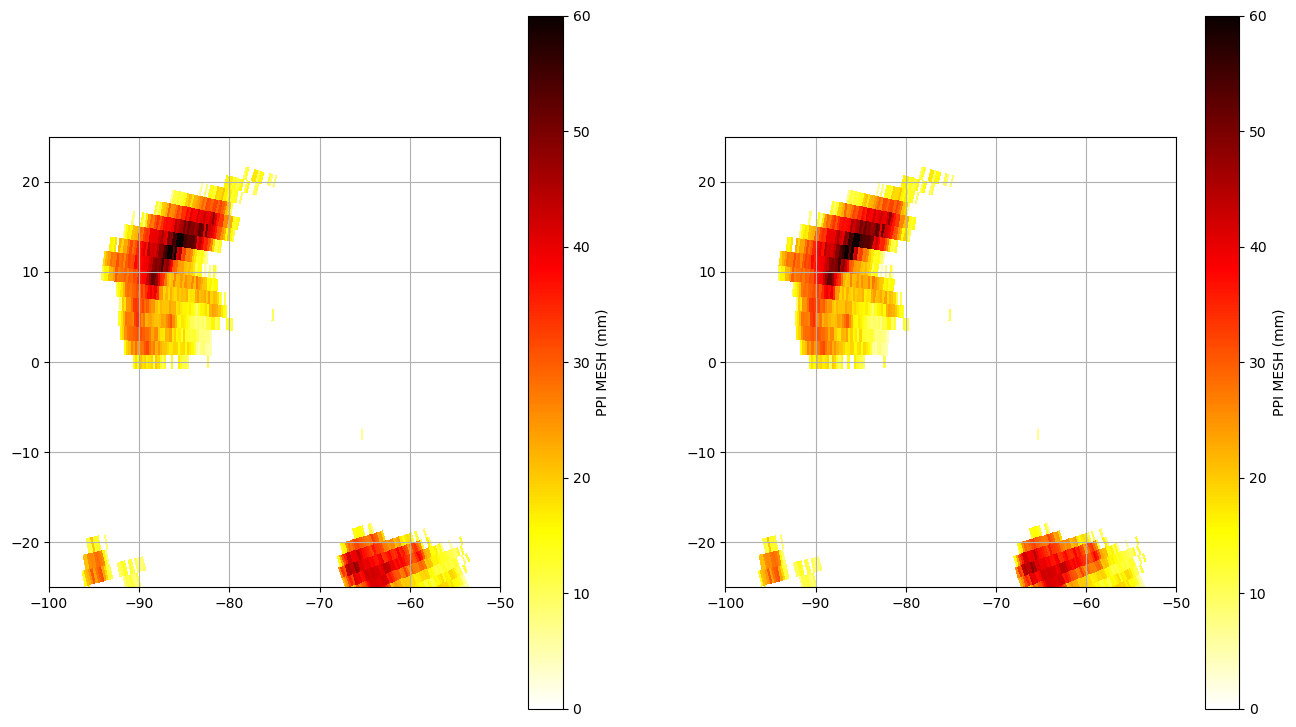

In [5]:
#plotting

x_coords = radar_datasets[0]['x'].values/1000
y_coords = radar_datasets[0]['y'].values/1000
x_lim = [-100,-50]
y_lim = [-25, 25]

fig, axs = pl.subplots(nrows=1, ncols=2, figsize=(16, 9))
axs = axs.flatten()


im = axs[0].pcolormesh(x_coords, y_coords, radar_datasets[sweep0_idx]['mesh'].values, cmap='hot_r', vmin=0, vmax=60)
cbar = fig.colorbar(im, ax=axs[0], label='PPI MESH (mm)')

im = axs[1].pcolormesh(x_coords, y_coords, optimised_radar_datasets[sweep0_idx]['mesh'].values, cmap='hot_r', vmin=0, vmax=60)
cbar = fig.colorbar(im, ax=axs[1], label='PPI MESH (mm)')


for ax in axs:
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.grid()
    ax.set_aspect('equal', 'box')

